## Telescope data
Binary Classification model using XGBoost

Classified as either gamma or hadron

In [2]:
import pandas as pd
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import xgboost as xgb
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
telescope_data = pd.read_csv('telescope_data.csv')
telescope_data

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...,...
19015,19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [4]:
telescope_data['class'] = (telescope_data['class'] == 'g').astype(int) 

In [5]:
xg_model = xgb.XGBClassifier(objective='binary:logistic',
                             n_estimators=100,
                             max_depth=5,
                             learning_rate=0.1,
                             random_state=42 
                            )
x = telescope_data.drop(columns=['class', 'Unnamed: 0'])
y = telescope_data['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [6]:
xg_model.fit(x_train, y_train)
class_predict = xg_model.predict(x_test)
classification_acc = xg_model.score(x_test, y_test)

classification_acc

In [ ]:
metrics_report = classification_report(y_test, class_predict)

print(metrics_report)

              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1347
           1       0.88      0.95      0.91      2457

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804



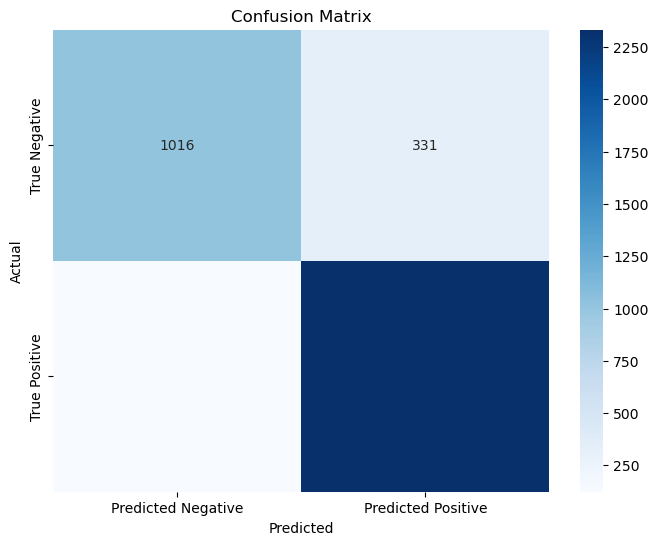

In [ ]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, class_predict)

In [ ]:
print(c_matrix)

[[1016  331]
 [ 124 2333]]


In [ ]:
matrix_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=['Negative', 'Positive'])
matrix_display.plot()

NameError: name 'ConfusionMatrixDisplay' is not defined